In [2]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [7]:
hist_marks = gpd.read_file('../data/Historical Markers.geojson')
print(hist_marks.crs)
hist_marks.head( )

EPSG:4326


,number,location,latitude,marker_name,marker_text,longitude,year_erected,civil_war_site,geometry
0,120,"Hume-Fogg High School, 700 Broadway",36.159303,Randall Jarrell 1914-1965,"Distinguished poet, critic, novelist, and teac...",-86.781572,2005,NaN,POINT (-86.78157 36.15930)
1,78,Belle Meade Boulevard at Warner Park entrance,36.083058,Percy Warner Park 2058.1 Acres,Percy Warner (1861-1927) was a pioneer in elec...,-86.867129,1982,NaN,POINT (-86.86713 36.08306)
2,94,Union Street and Capitol Boulevard,36.163758,Votes for Women,"On August 18, 1920, Tennessee became the 36th ...",-86.78287,1995,NaN,POINT (-86.78287 36.16376)
3,215,Lock 2 Road,36.244216,Lock 2 Park,"In 1888, the U.S. Army Corps of Engineers soug...",-86.70192,2020,NaN,POINT (-86.70192 36.24422)
4,127,Smith Springs Road and Old Murfreesboro Road,36.096776,Una Community,The Una community developed around the crossro...,-86.654516,2008,NaN,POINT (-86.65452 36.09678)


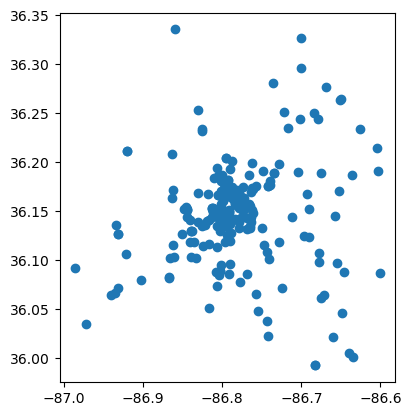

In [10]:
hist_marks.plot();

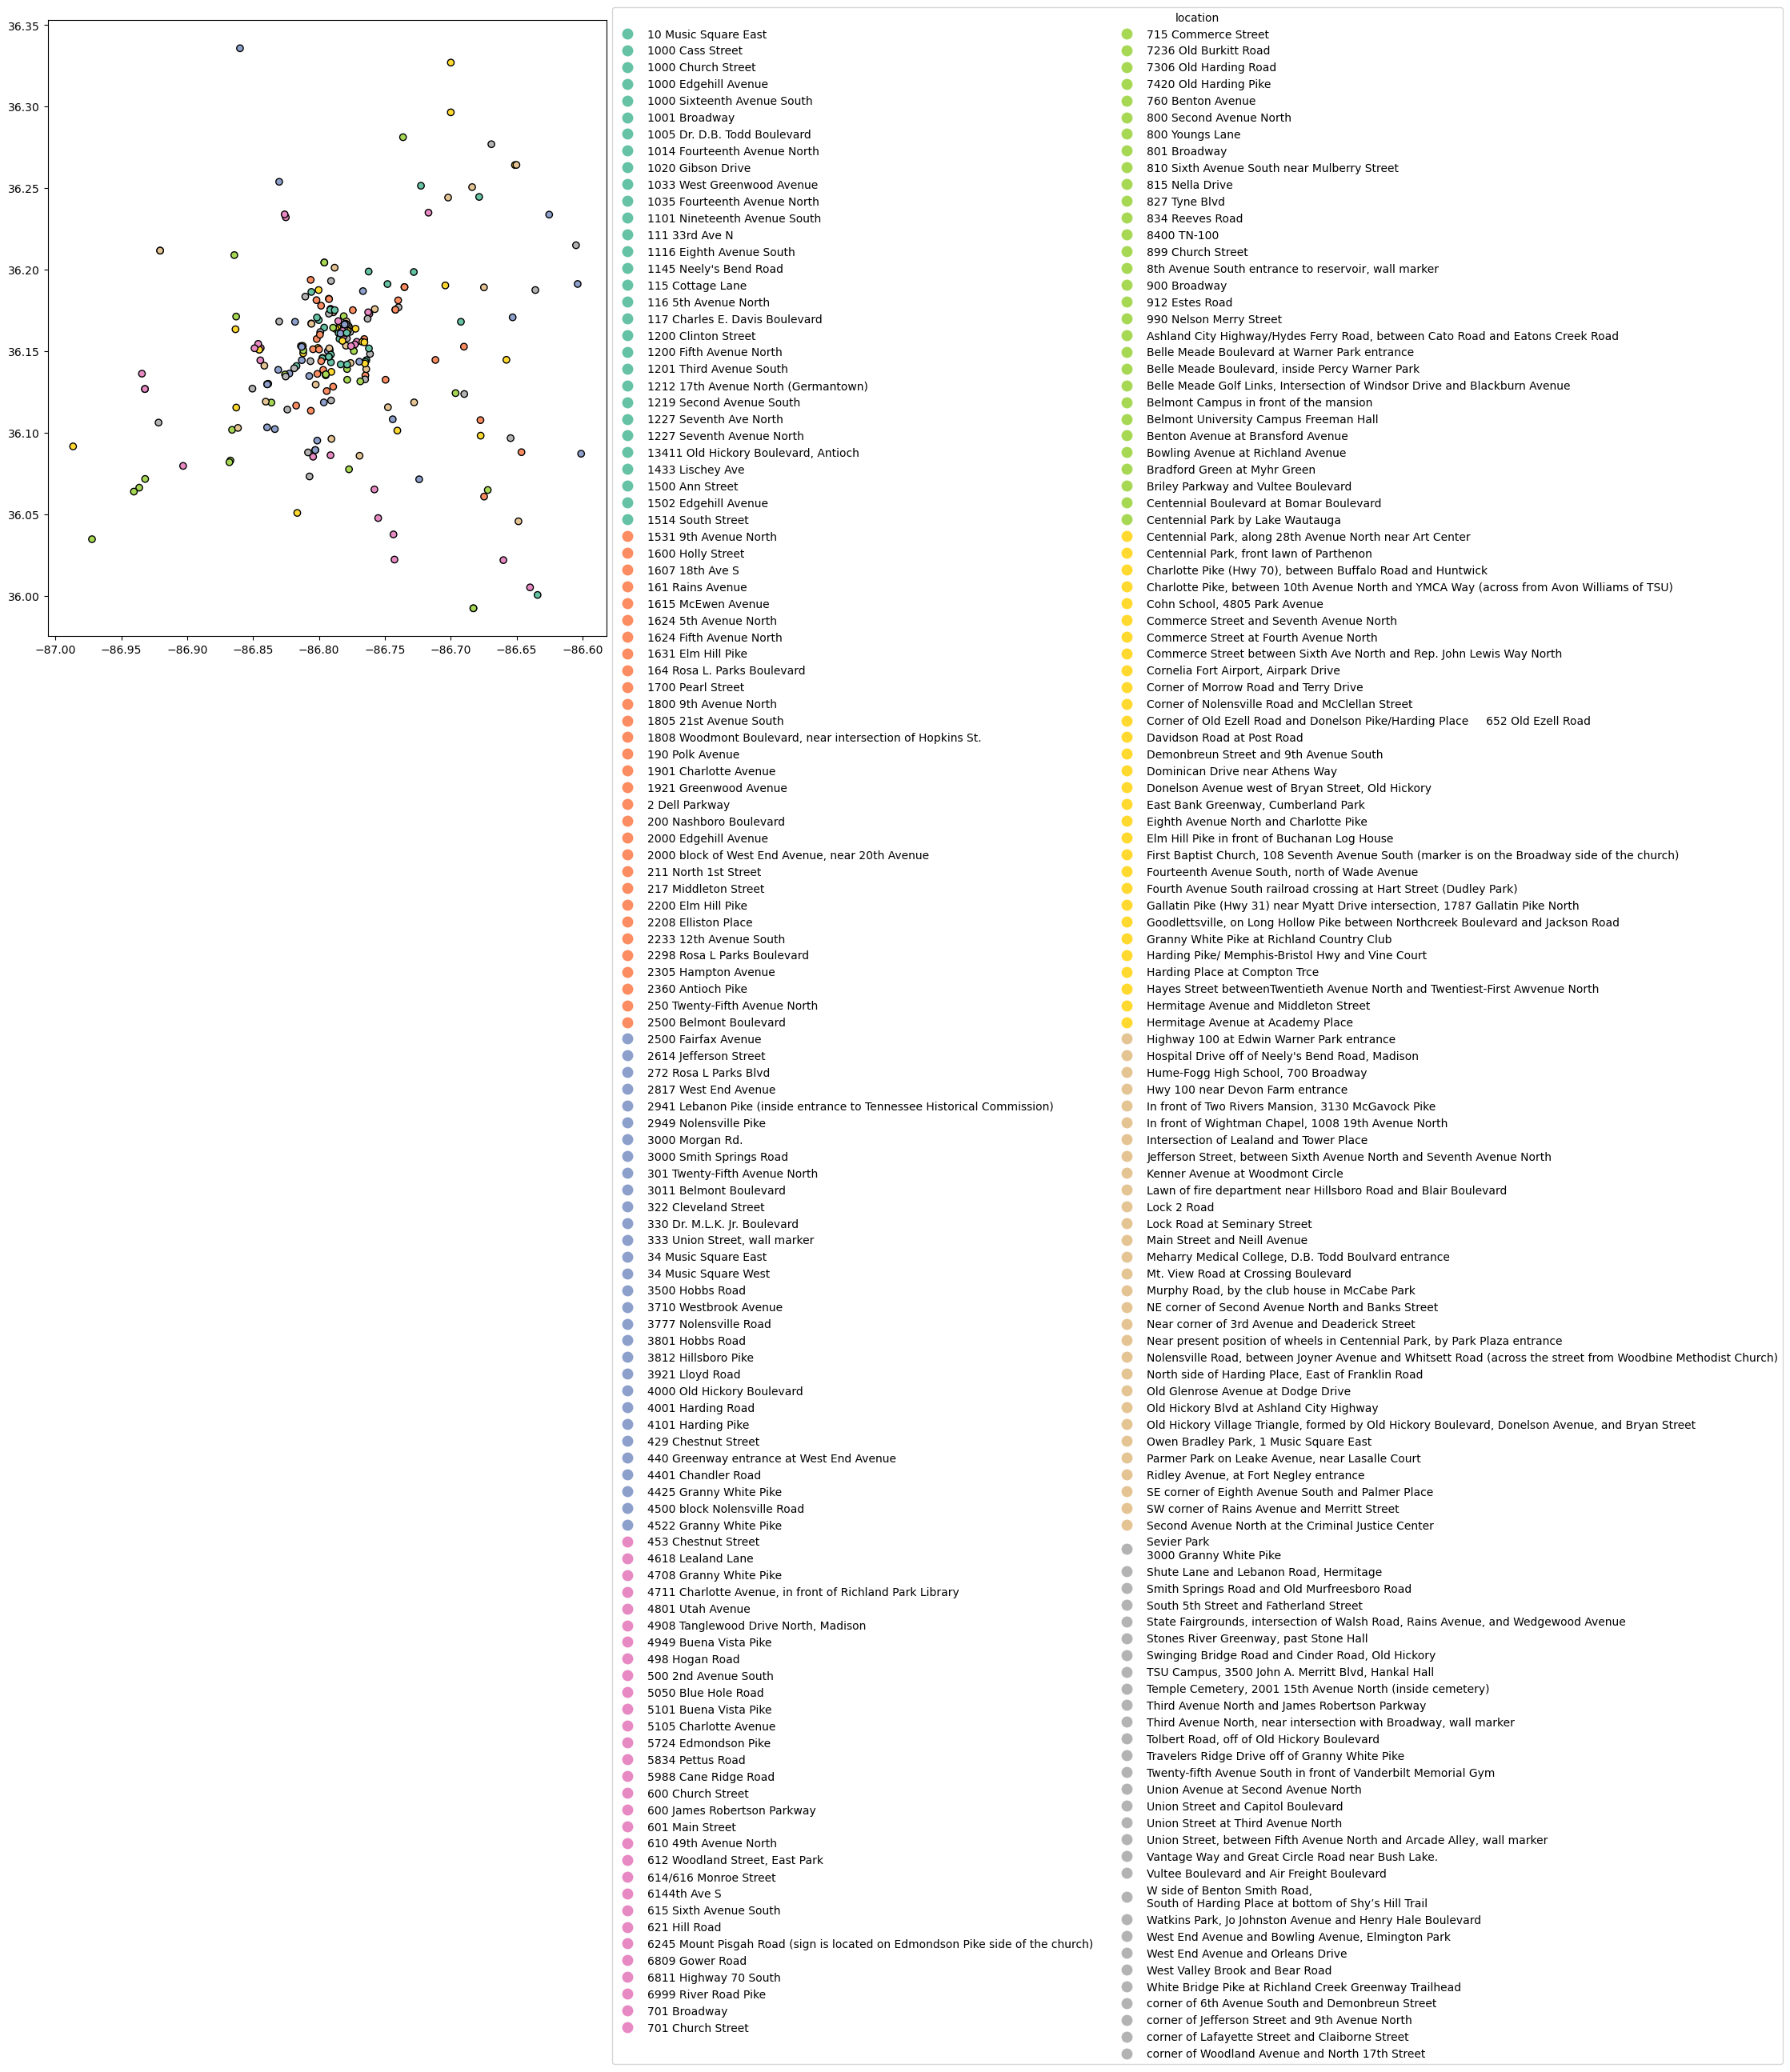

In [12]:
leg_kwds = {'title': 'location', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

hist_marks.plot(column = 'location', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [19]:
parks = gpd.read_file('../data/Metro Parks Boundaries (GIS).geojson')
print(parks.crs)
parks.head( )

EPSG:4326


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [83]:
parks = gpd.sjoin(hist_marks, parks, op = 'within')

C:\Users\rober\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [85]:
parks['year_estab'].value_counts()

year_estab
1903    3
1926    2
1956    1
1960    1
1913    1
1975    1
1997    1
2013    1
1938    1
2012    1
2015    1
Name: count, dtype: int64

In [60]:
parks1914 = parks.loc[parks['year_estab']>'1914']
parks1914.shape

(263, 10)

In [62]:
polygon_park = parks.loc[parks['year_estab']>'1914']
polygon_park.shape

(263, 10)

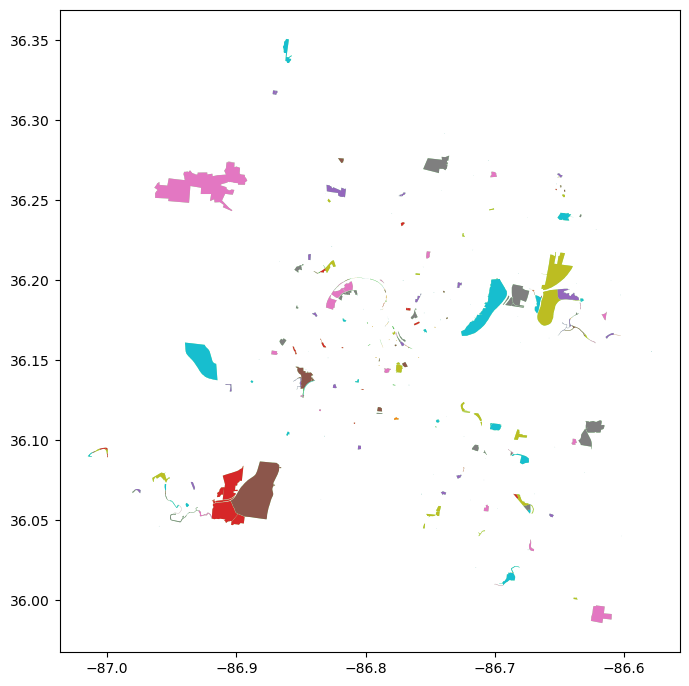

In [86]:
ax = polygon_park.plot(figsize = (8, 10), color = 'lightgreen')
parks1914.plot( ax = ax, column = 'acres');
plt.show();

In [66]:
polygon_park.geometry.centroid


C:\Users\rober\AppData\Local\Temp\ipykernel_33464\720575143.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon_park.geometry.centroid


0      POINT (-86.95820 36.07700)
1      POINT (-86.93816 36.05943)
2      POINT (-86.93354 36.07160)
3      POINT (-86.92646 36.15017)
4      POINT (-86.92705 36.25907)
                  ...            
282    POINT (-86.62439 36.16174)
283    POINT (-86.60553 36.16567)
284    POINT (-86.64075 36.17175)
285    POINT (-86.82833 36.24953)
286    POINT (-86.71056 36.04204)
Length: 263, dtype: geometry

In [67]:
center = polygon_park.geometry.centroid[100]
print(center)

POINT (-86.63272432568832 36.187534777221416)


C:\Users\rober\AppData\Local\Temp\ipykernel_33464\8443641.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon_park.geometry.centroid[100]


In [68]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.187534777221416, -86.63272432568832]


In [69]:
#create our map of Nashville Zip Code 37207 and show it
map_hist = folium.Map(location =  area_center, zoom_start = 12)
map_hist

In [70]:
i = 0
for row_index, row_values in parks1914.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
acres                                                     69.86
name                                         Harpeth River Park
year_estab                                                 1988
common_nam                                        Harpeth River
status                                                     PARK
address                                     7820 Coley Davis Rd
lon                                                 -86.9592214
lat                                                 36.07738249
descriptio    Harpeth River State Park has much historical a...
geometry      MULTIPOLYGON (((-86.9554652476398 36.079301455...
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
acres                                                      9.88
name                                         Harpeth Knoll Park
year_estab                                                 1972
common_nam                                        Harpeth Knoll
stat

In [91]:

map_hist = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon_park).add_to(map_hist)



for row_index, row_values in parks1914.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['name'])
    icon=folium.Icon(color="blue",icon="tree", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_hist)
map_hist.save('../maps/map_hist.html')

map_hist